<a href="https://colab.research.google.com/github/georgeaidinis/NTUA/blob/master/NN/Lab%201/B8-B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Αϊδίνης Γιώργος 03116031

Κολιός Παναγιώτης 03116100

---

Ομάδα M.B.8

---


#Lab 1: Επιβλεπόμενη Μάθηση - Ταξινόμηση - Μεγάλο Dataset (B10 - Epileptic Seizure Recognition)

In [69]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)


# Β. Εισαγωγή του Dataset

Multiclass Classification: Το συγκεκριμένο dataset χρησιμοποιείται και για multiclass και για binary (1 vs 2-5) classification. Λόγω του παραπάνω, και καθώς στο small dataset κάναμε binary classification επιλέξαμε να κάνουμε multiclass σε αυτό.

1. Έγινε καταγραφή της δραστηριότητας του εγκεφάλου 500 ατόμων για 23.6 δευτερόλεπτα/καταγραφή. Στόχος είναι η λήψη σωστής απόφασης περί του αν το άτομο βρίσκεται σε επιληπτική κρίση ή όχι. Έγινε δειγματοληψία κάθε καταγραφής, η οποία οδήγησε σε 4097 δείγματα. Τα 4097 δείγματα χωρίστηκαν σε 23 κομμάτια, με το καθένα να περιέχει 178 σημεία, που αντιστοιχούν σε 1 δευτερόλεπτο καταγραφής. Έτσι δημιουργήθηκαν 23*500 = 11500 γραμμές-δείγματα, καθένα από τα οποία αποτελείται από 178 σημεία που αντιστοιχούν σε 1 δευτερόλεπτο και αποτελόυν τη διάσταση των δεδομένων εισόδου. Η τελευταία στήλη περιέχει τις ετικέτες, οι οποίες παίρνουν τιμές 1-5, με την περίπτωση 1 να αφορά τις περιπτώσεις όπου το άτομο είχε επιληπτική κρίση και τις 2-5 τις περιπτώσεις όπου δεν είχε. 


In [0]:
from urllib.request import urlretrieve
import os
from zipfile import ZipFile

def download(url, file):
    if not os.path.isfile(file):
        print("Download file... " + file + " ...")
        urlretrieve(url,file)
        print("File downloaded")

In [71]:
download("http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv","ESR.csv")
print("All the files are downloaded")

All the files are downloaded


In [72]:
!ls

ESR.csv  sample_data  tmp


In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv("ESR.csv")

2. Όπως είπαμε παραπάνω και όπως φαίνεται παρακάτω, υπάρχουν 11500 δείγματα, το καθένα με 178 χαρακτηριστικά, τα οποία αφορούν τις μεταβολές της ηλεκτρικής τάσης των σημάτων στους νευρώνες του ανθρωπίνου εγκεφάλου. Συνεπώς είναι διατεταγμένα. Επίσης είναι ακέραιοι αριθμοί.
3. Υπάρχουν επικεφαλίδες στην πρώτη γραμμή και στοιχεία για το εκάστοτε δείγμα στην πρώτη στήλη, οι οποίες θα πρέπει να αφαιρεθούν. Επίσης υπάρχουν χαρακτηριστικά των δειγμάτων στην πρώτη κολώνα, τα οποία αφαιρούμε παρακάτω.

In [74]:
print(df.shape)

(11500, 180)


In [75]:
df #print the dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


In [76]:
print ("We have ",len(df.columns), " attributes.")
for i in range(0, len(df.columns)):
    print('{:<10}{:<40}{:<10}{:<20}'.format(str(i+1), str(df.columns[i]),"type: ", str(df.dtypes[df.columns[i]])))

We have  180  attributes.
1         Unnamed: 0                              type:     object              
2         X1                                      type:     int64               
3         X2                                      type:     int64               
4         X3                                      type:     int64               
5         X4                                      type:     int64               
6         X5                                      type:     int64               
7         X6                                      type:     int64               
8         X7                                      type:     int64               
9         X8                                      type:     int64               
10        X9                                      type:     int64               
11        X10                                     type:     int64               
12        X11                                     type:     int64               
13

4. Όπως είπαμε οι ετικέτες αφορούν 5 περιπτώσεις και βρίσκονται στην τελευταία στήλη. Τις αφαιρούμε παρακάτω και δημιουργούμε τα labels. Οι κλάσεις 2-5 αφορούν περιπτώσεις όπως το αν το άτομο είχε ανοικτά ή κλειστά τα μάτια του κατά τη διάρκεια της εξέτασης.
5. Διαγράφουμε την πρώτη κολώνα, ώστε όλες οι κολώνες εκτός της τελευταίας να περιέχουν τιμές των χαρακτηριστικών, με την τελευταία να περιέχει τις ετικέτες.

In [77]:
labels = df.iloc[:, 179]
df = df.iloc[:, 0:179]   #remove lables from set

df = df.drop(df.columns[[0]], axis=1)
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,...,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,...,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,...,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,...,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55


6. Δεν υπάρχουν απουσιάζουσες τιμές.
7. Χρησιμοποιούμε την bincount για να μετρήσουμε τη συχνότητα των κατηγοριών. Παρατηρούμε οτι έχουμε ενα εξαιρετικά ισορροπημένο dataset. Και οι 5 κατηγορίες είναι ισοπληθείς. 


In [78]:
print("frequencies:", np.bincount(labels)[1:])

frequencies: [2300 2300 2300 2300 2300]


8. Διαχωρίζουμε σε train και test set. Οι τιμές των χαρακτηριστικών αφορούν τα εγκεφαλικά σήματα (τάσεις), άρα είναι διατεταγμένα.

In [79]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(df, labels, test_size=0.3)
print(len(train))

8050


# Γ. Baseline Classification

##### Dummy Classifiers

Εκπαιδεύουμε τους classifiers με τις default τιμές για να δούμε συγκρίνουμε τα αποτέλεσματα πριν και μετά την προεργασία. <br>

Αρχίζουμε με τους Dummy Classifiers. Παρατηρούμε οτι επιτυγχάνουμε σε όλους περίπου 20% επιτυχία, όπως ήταν αναμενόμενο καθώς έχουμε 5 κατηγορίες.

In [80]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#using fit to train the classifiers
model_uniform = dc_uniform.fit(train, train_labels)
model_constant_1 = dc_constant_1.fit(train, train_labels)
model_constant_2 = dc_constant_2.fit(train, train_labels)
model_most_frequent = dc_most_frequent.fit(train, train_labels)
model_stratified = dc_stratified.fit(train, train_labels)

#now we make our predictions
preds_uniform = dc_uniform.predict(test)
preds_constant_1 = dc_constant_1.predict(test)
preds_constant_2 = dc_constant_2.predict(test)
preds_most_frequent = dc_most_frequent.predict(test)
preds_stratified = dc_stratified.predict(test)

#print prediction accuracy
accuracy = {}
print("Uniform Classifier: ", accuracy_score(test_labels, preds_uniform))
print("Constant Classifier (1): ", accuracy_score(test_labels, preds_constant_1))
print("Constant Classifier (2): ", accuracy_score(test_labels, preds_constant_2))
print("Most Frequent Classifier: ", accuracy_score(test_labels, preds_most_frequent))
print("Stratified Classifier: ", accuracy_score(test_labels, preds_stratified))

Uniform Classifier:  0.1936231884057971
Constant Classifier (1):  0.20231884057971014
Constant Classifier (2):  0.20115942028985506
Most Frequent Classifier:  0.19507246376811593
Stratified Classifier:  0.19884057971014493


Εκτυπώνουμε τον confusion matrix. Ο $C$ είναι ο πίνακας για τον οποίο ισχύει οτι $C_{i, j}$ είναι τα δείγματα της κατηγορίας $i$ που ταξινομήθηκαν στην $j$. Όπως φαίνεται οι Uniform και Stratified προβλέπουν οποιαδήποτε κατηγορία, ενώ οι άλλοι 3 είτε επιλέγουν σταθερά μία κατηγορία είτε αυτή με τα περισσότερα δείγματα. Μάλιστα, από τη στιγμή που τα δείγματα στο αρχικό data set είναι ίσα μεταξύ τους, τα πολυπληθέστερα δείγματα στο train set θα είναι τα λιγότερο πολυπληθή στο test set. Άρα ο classifier αυτός θα έχει χειρότερη επίδοση από τους constant classifiers, όπως φαίνεται και από τον confusion matrix.

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

#produce confusion matrices
cnf_matrix_uniform = confusion_matrix(test_labels, preds_uniform)
cnf_matrix_constant_1 = confusion_matrix(test_labels, preds_constant_1)
cnf_matrix_constant_2 = confusion_matrix(test_labels, preds_constant_2)
cnf_matrix_most_frequent = confusion_matrix(test_labels, preds_most_frequent)
cnf_matrix_stratified = confusion_matrix(test_labels, preds_stratified)

#print confusion matrices
print("Uniform Classifier Confusion Matrix\n")
print(cnf_matrix_uniform, "\n")
print("Constant Classifier (1) Confusion Matrix\n")
print(cnf_matrix_constant_1, "\n")
print("Constant Classifier (2) Confusion Matrix\n")
print(cnf_matrix_constant_2, "\n")
print("Most Frequent Classifier Confusion Matrix\n")
print(cnf_matrix_most_frequent, "\n")
print("Stratified Classifier Confusion Matrix\n")
print(cnf_matrix_stratified, "\n")


Uniform Classifier Confusion Matrix

[[125 131 160 141 141]
 [122 154 146 145 127]
 [145 142 141 125 134]
 [154 129 138 131 146]
 [144 135 140 137 117]] 

Constant Classifier (1) Confusion Matrix

[[698   0   0   0   0]
 [694   0   0   0   0]
 [687   0   0   0   0]
 [698   0   0   0   0]
 [673   0   0   0   0]] 

Constant Classifier (2) Confusion Matrix

[[  0 698   0   0   0]
 [  0 694   0   0   0]
 [  0 687   0   0   0]
 [  0 698   0   0   0]
 [  0 673   0   0   0]] 

Most Frequent Classifier Confusion Matrix

[[  0   0   0   0 698]
 [  0   0   0   0 694]
 [  0   0   0   0 687]
 [  0   0   0   0 698]
 [  0   0   0   0 673]] 

Stratified Classifier Confusion Matrix

[[143 138 133 139 145]
 [154 148 136 129 127]
 [136 136 129 138 148]
 [135 144 153 125 141]
 [139 130 137 126 141]] 



Εκτύπωση f1-micro average και f1-macro average.

Η ακρίβεια αφορά την ικανότητα του εκτιμητή να εκτιμά ως δείγματα του test set που ανήκουν στη θετική κλάση μόνο αυτά που όντως ανήκουν.<br>
Precision: $$P = \frac{T_p}{T_p+F_p}$$

Η ανάκληση αφορά την ικανότητα του εκτιμητή να εντοπίζει όλα τα δείγματα που ανήκουν στη θετική κλάση.<br>
Recall: $$R = \frac{T_p}{T_p + F_n}$$

F1 score είναι ο αρμονικός μέσος όρος αυτών των δύο.<br>
F1: $$F1 = 2\frac{P \times R}{P+R}$$

Macro average: υπολογίζει f1 ξεχωριστά για κάθε κλάση και παίρνει τον μέσο όρο. Άρα κάθε κλάση αντιμετωπίζεται ισότιμα.

Micro average: ενσωματώνει την πληροφορία για τον αριθμό των δειγμάτων που ανήκουν σε κάθε κλάση, χρησιμοποιώντας τις πραγματικές ποσότητες $T_p$, $F_p$, $F_n$ στον συνολικό υπολογισμό. Άρα είναι προτιμότερη όταν μία κλάση περιέχει αρκετά περισσότερα δείγματα.

In [82]:
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

#f1-micro
print('\033[1m' + "f1-micro" + '\033[0m')
print("Uniform Classifier: ", precision_recall_fscore_support(test_labels, preds_uniform, average='micro'))
print("Constant Classifier (1): ", precision_recall_fscore_support(test_labels, preds_constant_1, average='micro'))
print("Constant Classifier (2): ", precision_recall_fscore_support(test_labels, preds_constant_2, average='micro'))
print("Most Frequent Classifier: ", precision_recall_fscore_support(test_labels, preds_most_frequent, average='micro'))
print("Stratified Classifier: ", precision_recall_fscore_support(test_labels, preds_stratified, average='micro'), "\n")


#f1-macro
print('\033[1m' + "f1-macro" + '\033[0m')
print("Uniform Classifier: ", precision_recall_fscore_support(test_labels, preds_uniform, average='macro'))
print("Constant Classifier (1): ", precision_recall_fscore_support(test_labels, preds_constant_1, average='macro'))
print("Constant Classifier (2): ", precision_recall_fscore_support(test_labels, preds_constant_2, average='macro'))
print("Most Frequent Classifier: ", precision_recall_fscore_support(test_labels, preds_most_frequent, average='macro'))
print("Stratified Classifier: ", precision_recall_fscore_support(test_labels, preds_stratified, average='macro'))



f1-micro
Uniform Classifier:  (0.1936231884057971, 0.1936231884057971, 0.19362318840579712, None)
Constant Classifier (1):  (0.20231884057971014, 0.20231884057971014, 0.20231884057971014, None)
Constant Classifier (2):  (0.20115942028985506, 0.20115942028985506, 0.20115942028985506, None)
Most Frequent Classifier:  (0.19507246376811593, 0.19507246376811593, 0.19507246376811593, None)
Stratified Classifier:  (0.19884057971014493, 0.19884057971014493, 0.19884057971014493, None) 

f1-macro
Uniform Classifier:  (0.19347564430799644, 0.19355056188713582, 0.19347425031713672, None)
Constant Classifier (1):  (0.04046376811594203, 0.2, 0.06730954676952748, None)
Constant Classifier (2):  (0.04023188405797101, 0.2, 0.06698841698841698, None)
Most Frequent Classifier:  (0.03901449275362319, 0.2, 0.0652922629153529, None)
Stratified Classifier:  (0.19870404287388205, 0.1988986445776997, 0.19874749537894051, None)


##### Gaussian Naive Bayes

Ο Gaussian Nauve Bayes υποθέτει οτι τα χαρακτηριστικά είναι ανεξάρτητα μεταξύ τους. Έτσι συνδέει κάθε χαρακτηριστικό $x_i$ με κάθε κλάση $y$ με την πιθανότητα $P(x_i \mid y)$, η οποία υποθέτει πως ακολουθεί γκαουσιανή κατανομή. Χρησιμοποιεί τα δεδομένα προκειμένου για κάθε κλάση και χαρακτηριστικό, το οποίο παίρνει συνεχείς τιμές, να βρει τη μέση τιμή $\mu_y$ και τη διακύμανση $\sigma^2_y$ κάθε χαρακτηριστικού για τη κλάση $y$. Στην φάση του testing λαμβάνει υπόψην του τα γινόμενα των παραπάνω πιθανοτήτων των χαρακτηριστικών για κάθε κλάση, καθώς και την πιθανότητα της ίδιας της κλάσης και αναθέτει στο δείγμα την κλάση που μεγιστοποιεί το τελικό γινόμενο.

Παρατηρούμε πως η ενσωμάτωση πληροφορίας, ακόμα και όταν έχουμε κάνει τις παραπάνω υποθέσεις υπερδιπλασιάζει την ακρίβεια των προβλέψεών μας.

Επίσης, όπως φαίνεται από το confusion matrix υπάρχει αναθέτει πολλά δείγματα στην πέμπτη κλάση. Ωστόσο επιτυγχάνει σε μεγάλο βαθμό να εντοπίσει τις επιληπτικές κρίσεις (πρώτη κλάση).

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#finding mean values and variations
model_GNB = gnb.fit(train, train_labels)

#making predictions
preds = {}
preds["Gaussian Naive Bayes"] = gnb.predict(test)

#calculate and print prediction accuracy
accuracy = {}
accuracy["Gaussian Naive Bayes"] = accuracy_score(test_labels, preds["Gaussian Naive Bayes"])
print("Gaussian Naive Bayes: ", accuracy["Gaussian Naive Bayes"], "\n")

#produce and print confusion matrix
cnf_matrix_GNB = confusion_matrix(test_labels, preds["Gaussian Naive Bayes"])
print('\033[1m' + "Gaussian Naive Bayes - Confusion Matrix" + '\033[0m')
print(cnf_matrix_GNB, "\n")

#f1-micro/macro
print('\033[1m' + "f1-micro" + '\033[0m')
print("Gaussian Naive Bayes: ", precision_recall_fscore_support(test_labels, preds["Gaussian Naive Bayes"], average='micro'))
print('\033[1m' + "f1-macro" + '\033[0m')
print("Gaussian Naive Bayes: ", precision_recall_fscore_support(test_labels, preds["Gaussian Naive Bayes"], average='macro'))



Gaussian Naive Bayes:  0.443768115942029 

Gaussian Naive Bayes - Confusion Matrix
[[586 109   0   3   0]
 [ 43 114  94  89 354]
 [  2  85 125 118 357]
 [  0 161 121 195 221]
 [  0  31  80  51 511]] 

f1-micro
Gaussian Naive Bayes:  (0.443768115942029, 0.443768115942029, 0.443768115942029, None)
f1-macro
Gaussian Naive Bayes:  (0.4472117216530095, 0.44488271791220485, 0.4239196274192298, None)


##### kNN

Ο kNN υπολογίζει, για κάθε δείγμα του test set, τους k κοντινότερους γείτονές του, οι οποίοι είναι δείγματα του train set, στον n-διάστατο χώρο διαστάσεων των χαρακτηριστικών εισόδου. Αποφασίζει την κλάση του νέου δείγματα παίρνοντας είτε την πλειοψηφία των γειτόνων είτε λαμβάνοντας υπόψην και τις αποστάσεις του από αυτούς. Ως συνάρτηση απόστασης χρησιμοποιείται κυρίως η ευκλείδια. <br>
Εξαιρετικά σημαντική για την απόδοσή του είναι η υπερπαράμετρος k. 

Το γεγονός οτι πρέπει να συγκρίνουμε την απόσταση κάθε νέου δείγματος στο train set με το νέο δείγμα καθιστά τη διαδικασία πρόβλεψης πολύ χρονοβόρα.
Ωστόσο, η μεγάλη διαφορά από τον GNB είναι οτι δεν κάνει υποθέσεις για τις εξαρτήσεις των χαρακτηριστικών και τις κατανομές των πιθανοτήτων.

Παρατηρούμε οτι επιτυγχάνει καλύτερες προβλέψεις από τον GNB, ωστόσο το ποσοστό είναι ακόμα χαμηλό.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) #setting k to 5

#saves training samples and their labels
knn.fit(train, train_labels)

#making predictions
preds["kNN"] = knn.predict(test)

#calculate and print prediction accuracy
accuracy["kNN"] = accuracy_score(test_labels, preds["kNN"])
print("kNN: ", accuracy["kNN"])

kNN:  0.46840579710144925


In [85]:
#produce and print confusion matrix
cnf_matrix_GNB = confusion_matrix(test_labels, preds["kNN"])
print('\033[1m' + "kNN - Confusion Matrix" + '\033[0m')
print(cnf_matrix_GNB, "\n")

#f1-micro/macro
print('\033[1m' + "f1-micro" + '\033[0m')
print("kNN: ", precision_recall_fscore_support(test_labels, preds["kNN"], average='micro'))
print('\033[1m' + "f1-macro" + '\033[0m')
print("kNN: ", precision_recall_fscore_support(test_labels, preds["kNN"], average='macro'))

kNN - Confusion Matrix
[[480 107  74  32   5]
 [  2 445 243   0   4]
 [  0 234 444   1   8]
 [  0 173 213 186 126]
 [  0 282 329   1  61]] 

f1-micro
kNN:  (0.46840579710144925, 0.46840579710144925, 0.46840579710144925, None)
f1-macro
kNN:  (0.5679317350196911, 0.46645844844078, 0.45281563214582343, None)


##### Multi Layer Perceptron

Ένα MLP περιέχει το input layer, το οποίο δέχεται τις εισόδους, 1 ή περισσότερα ενδιάμεσα επίπεδα, τα οποία αποτελούνται από νευρώνες που δέχονται εισόδους από τους νευρώνες του προηγούμενου επιπέδου, εφαρμόζουν βάρη σε αυτές και τις προσθέτουν μαζί με ένα bias. Μετά εφαρμόζουν στο αποτέλεσμα μία μη γραμμική συνάρτηση δημιουργώντας έτσι την έξοδο που προωθείται στο επόμενο επίπεδο. Στο τέλος έχουν ένα output layer, το οποίο κάνει και την τελική απόφαση.

Κατά την εκπαίδευσή τους, ελαχιστοποιούν ένα κριτήριο αλλάζοντας τις τιμές των βαρών και των biases τους. 

Παρατηρούμε οτι δεν αποδίδει καλύτερα ούτε από τους Dummy Classifiers.

In [86]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)

#training
clf.fit(train, train_labels)

#predicting
preds["Multi Layer Perceptron"] = clf.predict(test)

#calculate and print prediction accuracy
accuracy["Multi Layer Perceptron"] = accuracy_score(test_labels, preds["Multi Layer Perceptron"])
print("Multi Layer Perceptron: ", accuracy["Multi Layer Perceptron"])

#produce and print confusion matrix
cnf_matrix_GNB = confusion_matrix(test_labels, preds["Multi Layer Perceptron"])
print('\033[1m' + "Multi Layer Perceptron - Confusion Matrix" + '\033[0m')
print(cnf_matrix_GNB, "\n")

#f1-micro/macro
print('\033[1m' + "f1-micro" + '\033[0m')
print("Multi Layer Perceptron: ", precision_recall_fscore_support(test_labels, preds["Multi Layer Perceptron"], average='micro'))
print('\033[1m' + "f1-macro" + '\033[0m')
print("Multi Layer Perceptron: ", precision_recall_fscore_support(test_labels, preds["Multi Layer Perceptron"], average='macro'))

Multi Layer Perceptron:  0.19246376811594204
Multi Layer Perceptron - Confusion Matrix
[[206 292  23 139  38]
 [214 304  11 148  17]
 [181 309   8 171  18]
 [183 342  23 123  27]
 [214 299  25 112  23]] 

f1-micro
Multi Layer Perceptron:  (0.19246376811594204, 0.19246376811594204, 0.19246376811594204, None)
f1-macro
Multi Layer Perceptron:  (0.17128384863799656, 0.19104144352436797, 0.1539170502486155, None)


##### Bar Graph

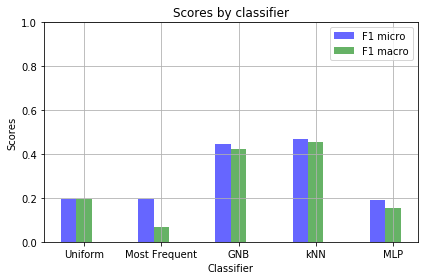

In [87]:
from sklearn.metrics import f1_score
import matplotlib
import matplotlib.pyplot as plt

n_groups = 5
f1_micro = (f1_score(test_labels, preds_uniform, average = 'micro'), 
            f1_score(test_labels, preds_most_frequent, average = 'micro'), 
            f1_score(test_labels, preds["Gaussian Naive Bayes"], average = 'micro'), 
            f1_score(test_labels, preds["kNN"], average = 'micro'),  
            f1_score(test_labels, preds["Multi Layer Perceptron"], average = 'micro'))

f1_macro = (f1_score(test_labels, preds_uniform, average = 'macro'), 
            f1_score(test_labels, preds_most_frequent, average = 'macro'), 
            f1_score(test_labels, preds["Gaussian Naive Bayes"], average = 'macro'), 
            f1_score(test_labels, preds["kNN"], average = 'macro'),  
            f1_score(test_labels, preds["Multi Layer Perceptron"], average = 'macro'))


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.6

rects1 = plt.bar(index, f1_micro, bar_width,
alpha=opacity,
color='b',
label='F1 micro')

rects2 = plt.bar(index + bar_width, f1_macro, bar_width,
alpha=opacity,
color='g',
label='F1 macro')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Scores by classifier')
plt.xticks(index + bar_width, ("Uniform", "Most Frequent", "GNB", "kNN", "MLP"))
plt.legend()
plt.ylim(0, 1)
plt.grid(True)


plt.tight_layout()
plt.show()


Σχεδόν σε όλες τις περιπτώσεις τα precision είναι σχεδόν ίσα με τα recall, που οδηγεί και σε κοντινούς f1 μέσους όρους. Επίσης όπως φαίνεται από τα confusion matrices οι kNN και GNB βρίσκουν επιτυχώς την πρώτη κλάση, που δηλώνει την επιληπτική κρίση αλλά όχι τόσο επιτυχώς τις άλλες. Αυτό σημαίνει οτι τα δεδομένα με ετικέτα 1 έιναι πολύ καλύτερα διαχωρισμένα από τα υπόλοιπα. Φαίνεται λοιπόν ο λόγος για τον οποίο το dataset χρησιμοποιείται και για binary classification.

Η απόδοση του perceptron είναι πολύ χαμηλή σε όλες τις μετρικές, γεγονός που υποδεικνύει την ανάγκη για προεργασία των δεδομένων στα νευρωνικά δίκτυα.

# Δ. Βελτιστοποίηση Ταξινομητών

Χρησιμοποιούμε την διαδικασία pipeline για την εφαρμογή διαδοχικών δεν υπάρχει μεγάλη ανάγκη για εφαρμογή oversampling ή undersampling. Αυτό επιβεβαιώθηκε όταν κάναμε τις ανάλογες δοκιμές. 

* Λόγω του ισορροπημένου dataset, όπως φαίνεται και παρακάτω, δεν χρειάζεται να χρησιμοποιήσουμε oversampler ή undersampler.

* Διαστατικότητα: Χρησιμοποιούμε τον μετασχηματιστή VarianceThreshold, ο οποίος μειώνει τον αριθμό των χαρακτηριστικών με βάση την διακύμανση των τιμών του στα δείγματα (επιλογή χαρακτηριστικών). Όταν η διακύμανση είναι μικρή θεωρούμε οτι το χαρακτηριστικό δεν προσφέρει πολλή πληροφορία για την κατηγοριοποίηση. <br>
Επίσης χρησιμοποιούμε τον PCA για την ανάλυση των δεδομένων σε κύριες συνιστώσες και την χρήση των συνιστωσών με την περισσότερη διακύμανση (εξαγωγή χαρακτηριστικών), δηλαδή πληροφορία. 

* Κανονικοποίηση: Αμβλύνουμε τις διαφορές μεταξύ των τιμών των χαρακτηριστικών. Αν ένα χαρακτηριστικό έχει πολύ μεγαλύτερες τιμές από ένα άλλο η σημασία του σε εκτιμητές όπως ο kNN, που μετρά τις αποστάσεις από τα χαρακτηριστικά, είναι μεγαλύτερη χωρίς αυτό να σημαίνει οτι παρέχει περισσότερη πληροφορία για την κατηγοριοποίηση. Χρησιμοποιούμε δύο μετασχηματιστές κανονικοποίησης, τον scaler και τον min_max_scaler. 

Η σειρά που ακολουθείται είναι η εξής:
0. minmax αν VarianceThreshold για να μην επηρεαστεί η επιλογή από τις τιμές των χαρακτηριστικών
1. Κανονικοποίηση (minmax ή z-score)
2. PCA
3. Εκτιμητής



Χρήση grid search για την βελτιστοποίηση των υπερπαραμέτρων. Φτιάχνουμε σύνολο πιθανών συνδυασμών τιμών των παραμέτρων για να βρόυμε τον βέλτιστο. Υπολογίζεται ο μέσος όρος σε όλα τα folds (5 εδώ) του cross-validation με βάση της f1 μετρικές. 

In [88]:
print("train frequencies:", np.bincount(train_labels)[1:])

train frequencies: [1602 1606 1613 1602 1627]


Εκτυπώνουμε την διακύμανση αφού έχουμε εφαρμόσει minmax για να υπολογίσουμε σωστά τα thresholds.

In [89]:
from sklearn.preprocessing import MinMaxScaler 

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(train)
train_variance = X_train_minmax.var(axis=0)
print(np.max(train_variance))
print(np.min(train_variance))


0.003699443925720919
0.0016128598715795769


In [0]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
import time

In [0]:
"""
  Prepares and applies GridSearchcv. Each processing step if None is not applied, else it is applied.
"""
def GridSearch(data, preprocessing_steps, parameters, classifier, Scoring):
  (train, train_labels, test, test_labels) = data
  dictionary = {} #dictionary for Gridsearch grid

  #checking for sampling condition
  if parameters["sampling_strategy"] < 0 or parameters["sampling_strategy"] > 1:
    parameters["sampling_strategy"] = 0
  if preprocessing_steps["sampling"] == "Over":
    ros = RandomOverSampler(parameters["sampling_strategy"])
  elif preprocessing_steps["sampling"] == "Under":
    ros = RandomUnderSampler(parameters["sampling_strategy"])
  else:
    ros = None

  #checking for Variance Threshold selector
  if preprocessing_steps["selector"] == "VT":
    preprocessing_steps["scaler"] == None   #no need for a scaler since we will use minmax in the beginning
    scaler_minmax = MinMaxScaler()   #minmax is applied before VT
    selector = VarianceThreshold()
    dictionary["selector__threshold"] = parameters["vthreshold"]
  else:
    scaler_minmax = None
    selector = None

  #checking for the use of a scaler
  if preprocessing_steps["scaler"] == "minmax":
    scaler = MinMaxScaler()
  elif preprocessing_steps["scaler"] == "zscore":
    scaler = StandardScaler()
  else:
    scaler = None

  #checking for the use of PCA
  if preprocessing_steps["extractor"] == "PCA":
    pca = PCA()
    dictionary["pca__n_components"] = parameters["n_components"]
  else:
    pca = None
  
  #creating estimator
  if classifier == "GNB":
    clf = GaussianNB()
  elif classifier == "kNN":
    clf = KNeighborsClassifier()
    dictionary["kNN__n_neighbors"] = parameters["k"]
    dictionary["kNN__weights"] = parameters["weights"]
    dictionary["kNN__metric"] = parameters["metrics"]
  elif classifier == "MLP":
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,), random_state=1)
    dictionary["MLP__solver"] = parameters["solver"]
    dictionary["MLP__max_iter"] = parameters["max_iter"]
    dictionary["MLP__alpha"] = parameters["alpha"]
    dictionary["MLP__hidden_layer_sizes"] = parameters["hidden_layer_sizes"]
    dictionary["MLP__activation"] = parameters["activation"]
    dictionary["MLP__learning_rate"] = parameters["learning_rate"]


  #create pipeline, using memory so that transformed data is saved and not recomputed with each fold change
  pipe = Pipeline(steps=[('sampler', ros), ('minmax_scaler', scaler_minmax), ('selector', selector), ('scaler', scaler), ('pca', pca), (classifier, clf)], memory = 'tmp')  

  #create estimator
  estimator = GridSearchCV(pipe, dictionary, cv=5, scoring=Scoring, n_jobs=-1) #number of folds is 5

  #fit and predict
  start_time = time.time()
  estimator.fit(train, train_labels)
  preds = estimator.predict(test)
  t = time.time() - start_time
  print("Συνολικός χρόνος fit και predict: %s seconds" % t)
  accuracy = accuracy_score(test_labels, preds)
  print("Accuracy: ", accuracy)
  print("Precision_Recall_fscore: ", precision_recall_fscore_support(test_labels, preds, average='micro'))
  print("Precision_Recall_fscore: ", precision_recall_fscore_support(test_labels, preds, average='macro'))

  #print(estimator.best_estimator_)
  print(estimator.best_params_, "\n")

  return preds, t, precision_recall_fscore_support(test_labels, preds, average='micro')[2], precision_recall_fscore_support(test_labels, preds, average='macro')[2]

##### Gaussian Naive Bayes

In [92]:
classifier = "GNB"

#setting up parameters
data = (train, train_labels, test, test_labels)
vthreshold = [0, 0.0017, 0.002, 0.0023] 
n_components = [10, 20, 30, 40, 50, 60, 70]

preprocessing_steps = {"sampling" : None, "selector" : None, "scaler" : None, "extractor" : None}
parameters = {"sampling_strategy" : 0, "vthreshold" : vthreshold, "n_components" : n_components}

#f1-micro
best_GNB_micro = 0
for selector in (None, "VT"):
  for scaler in (None, "minmax", "zscore"):
    for extractor in (None, "PCA"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-micro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_micro')
      preds, t, f1_micro, f1_macro = results
      if f1_micro > best_GNB_micro:
        print("Best so far:", f1_micro, "\n")
        best_GNB_micro_time = t
        best_GNB_micro_preds = preds
        best_GNB_micro = f1_micro


#f1-macro
best_GNB_macro = 0
for selector in (None, "VT"):
  for scaler in (None, "minmax", "zscore"):
    for extractor in (None, "PCA"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-macro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_macro')
      preds, t, f1_micro, f1_macro = results
      if f1_macro > best_GNB_macro:
        print("Best so far:", f1_macro, "\n")
        best_GNB_macro_time = t
        best_GNB_macro_preds = preds
        best_GNB_macro = f1_macro


 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': None} 
Συνολικός χρόνος fit και predict: 1.2828199863433838 seconds
Accuracy:  0.443768115942029
Precision_Recall_fscore:  (0.443768115942029, 0.443768115942029, 0.443768115942029, None)
Precision_Recall_fscore:  (0.4472117216530095, 0.44488271791220485, 0.4239196274192298, None)
{} 

Best so far: 0.443768115942029 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': 'PCA'} 
Συνολικός χρόνος fit και predict: 7.979326009750366 seconds
Accuracy:  0.6533333333333333
Precision_Recall_fscore:  (0.6533333333333333, 0.6533333333333333, 0.6533333333333333, None)
Precision_Recall_fscore:  (0.660099572694001, 0.6533748623673283, 0.6420097081522884, None)
{'pca__n_components': 50} 

Best so far: 0.6533333333333333 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': None} 
Συνολικός χρόνος fit και predic

##### kNN

Η αποτελεσματικότητα του kNN, εκτός από το k, εξαρτάται και από την ύπαρξη βαρών στον υπολογισμό των γειτόνων, δηλαδή από το αν οι κοντινοί γείτονες αποκτούν μεγαλύτερη σημασία από τους μακρινότερους. Εφαρμόζουμε 2 περιπτώσεις:
* uniform: όλοι οι γείτονες έχουν την ίδια σημασία
* distance: η σημασία είναι αντιστρόφως ανάλογη της απόστασης

Εκτός αυτού σημασία έχει και ο τρόπος υπολογισμού της απόστασης. Εφαρμόζουμε 2 τρόπους υπολογισμού:
* manhattan
* euclidean

In [0]:
classifier = "kNN"

#setting up parameters
data = (train, train_labels, test, test_labels)
vthreshold = [0, 0.0017, 0.002, 0.0023] 
n_components = [10, 15, 20, 25, 30, 35]
k = [1, 3, 5]
weights = ["uniform", "distance"]
metrics = ["euclidean", "manhattan"]

preprocessing_steps = {"sampling" : None, "selector" : None, "scaler" : None, "extractor" : None}
parameters = {"sampling_strategy" : 0, "vthreshold" : vthreshold, "n_components" : n_components, "k" : k, "weights" : weights, "metrics" : metrics}

#f1-micro
best_kNN_micro = 0
for selector in (None, "VT"):
  for scaler in (None, "minmax", "zscore"):
    for extractor in (None, "PCA"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-micro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_micro')
      preds, t, f1_micro, f1_macro = results
      if f1_micro > best_kNN_micro:
        print("Best so far:", f1_micro, "\n")
        best_kNN_micro_time = t
        best_kNN_micro_preds = preds
        best_kNN_micro = f1_micro

#f1-macro
best_kNN_macro = 0
for selector in (None, "VT"):
  for scaler in (None, "minmax", "zscore"):
    for extractor in (None, "PCA"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-macro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_macro')
      preds, t, f1_micro, f1_macro = results
      if f1_macro > best_kNN_macro:
        print("Best so far:", f1_micro, "\n")
        best_kNN_macro_time = t
        best_kNN_macro_preds = preds
        best_kNN_macro = f1_macro

f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 155.94002842903137 seconds
Accuracy:  0.5382608695652173<br>
Precision_Recall_fscore:  (0.5382608695652173, 0.5382608695652173, 0.5382608695652173, None)<br>
Precision_Recall_fscore:  (0.6116939651203526, 0.5362970303969432, 0.5345488609961603, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

Best so far: 0.5382608695652173 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 177.15761733055115 seconds
Accuracy:  0.5704347826086956<br>
Precision_Recall_fscore:  (0.5704347826086956, 0.5704347826086956, 0.5704347826086956, None)<br>
Precision_Recall_fscore:  (0.6205889157153534, 0.5691597423177073, 0.5728985444648659, None)<br>
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30} 

Best so far: 0.5704347826086956 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 160.4299430847168 seconds
Accuracy:  0.5368115942028986<br>
Precision_Recall_fscore:  (0.5368115942028986, 0.5368115942028986, 0.5368115942028986, None)<br>
Precision_Recall_fscore:  (0.6076885944706372, 0.5347848677885435, 0.5315050475325286, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 175.8805661201477 seconds
Accuracy:  0.567536231884058<br>
Precision_Recall_fscore:  (0.567536231884058, 0.567536231884058, 0.567536231884058, None)<br>
Precision_Recall_fscore:  (0.619623800305156, 0.5658816667447705, 0.5725327699900926, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 151.6079216003418 seconds
Accuracy:  0.5388405797101449<br>
Precision_Recall_fscore:  (0.5388405797101449, 0.5388405797101449, 0.5388405797101449, None)<br>
Precision_Recall_fscore:  (0.6145741881150677, 0.5369045265105867, 0.5355752757772972, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 179.2935791015625 seconds
Accuracy:  0.571304347826087<br>
Precision_Recall_fscore:  (0.571304347826087, 0.571304347826087, 0.571304347826087, None)<br>
Precision_Recall_fscore:  (0.625739943658974, 0.569659970930135, 0.5761206545738996, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30} 

Best so far: 0.571304347826087 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 531.2911882400513 seconds
Accuracy:  0.5368115942028986<br>
Precision_Recall_fscore:  (0.5368115942028986, 0.5368115942028986, 0.5368115942028986, None)<br>
Precision_Recall_fscore:  (0.6076885944706372, 0.5347848677885435, 0.5315050475325286, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0} 

f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 496.1291735172272 seconds
Accuracy:  0.524927536231884<br>
Precision_Recall_fscore:  (0.524927536231884, 0.524927536231884, 0.524927536231884, None)<br>
Precision_Recall_fscore:  (0.6018532717154714, 0.5275128810454286, 0.5198811975697916, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 617.9515242576599 seconds
Accuracy:  0.547536231884058<br>
Precision_Recall_fscore:  (0.547536231884058, 0.547536231884058, 0.547536231884058, None)<br>
Precision_Recall_fscore:  (0.6107291942171147, 0.5495094296596342, 0.5507985248694627, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 35, 'selector__threshold': 0} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 500.93980598449707 seconds
Accuracy:  0.524927536231884<br>
Precision_Recall_fscore:  (0.524927536231884, 0.524927536231884, 0.524927536231884, None)<br>
Precision_Recall_fscore:  (0.6018532717154714, 0.5275128810454286, 0.5198811975697916, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 629.9736206531525 seconds
Accuracy:  0.547536231884058<br>
Precision_Recall_fscore:  (0.547536231884058, 0.547536231884058, 0.547536231884058, None)<br>
Precision_Recall_fscore:  (0.6107291942171147, 0.5495094296596342, 0.5507985248694627, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 35, 'selector__threshold': 0} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 501.1655333042145 seconds
Accuracy:  0.5231884057971015<br>
Precision_Recall_fscore:  (0.5231884057971015, 0.5231884057971015, 0.5231884057971015, None)<br>
Precision_Recall_fscore:  (0.6000927571539625, 0.525751267524505, 0.5184719443303563, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 640.167172908783 seconds
Accuracy:  0.556231884057971<br>
Precision_Recall_fscore:  (0.556231884057971, 0.556231884057971, 0.556231884057971, None)<br>
Precision_Recall_fscore:  (0.6006751214045278, 0.5577667335009407, 0.5620974542733507, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 25, 'selector__threshold': 0} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 184.88850140571594 seconds
Accuracy:  0.5336231884057971<br>
Precision_Recall_fscore:  (0.5336231884057971, 0.5336231884057971, 0.5336231884057971, None)<br>
Precision_Recall_fscore:  (0.6131360900113694, 0.5329733267783303, 0.5306372847953326, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 171.44153213500977 seconds
Accuracy:  0.5626086956521739<br>
Precision_Recall_fscore:  (0.5626086956521739, 0.5626086956521739, 0.5626086956521739, None)<br>
Precision_Recall_fscore:  (0.5992006103045691, 0.5647486759490894, 0.5727681823114018, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 20} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 186.49681520462036 seconds
Accuracy:  0.5313043478260869<br>
Precision_Recall_fscore:  (0.5313043478260869, 0.5313043478260869, 0.5313043478260869, None)<br>
Precision_Recall_fscore:  (0.6103363608721251, 0.5305514318112949, 0.5285987558247256, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': 'PCA'}<br> 
Συνολικός χρόνος fit και predict: 177.48603010177612 seconds
Accuracy:  0.563768115942029<br>
Precision_Recall_fscore:  (0.563768115942029, 0.563768115942029, 0.563768115942029, None)<br>
Precision_Recall_fscore:  (0.6206978513352238, 0.5646466936923876, 0.5701676369000378, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 187.0180253982544 seconds
Accuracy:  0.5356521739130434<br>
Precision_Recall_fscore:  (0.5356521739130434, 0.5356521739130434, 0.5356521739130434, None)<br>
Precision_Recall_fscore:  (0.6140211191681275, 0.5349254670259016, 0.5319080253660903, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform'} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': 'PCA'}<br> 
Συνολικός χρόνος fit και predict: 179.02517986297607 seconds
Accuracy:  0.5626086956521739<br>
Precision_Recall_fscore:  (0.5626086956521739, 0.5626086956521739, 0.5626086956521739, None)<br>
Precision_Recall_fscore:  (0.6007418358630561, 0.5647921509814828, 0.573050155694501, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 20} 

Best so far: 0.5626086956521739 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 633.8428337574005 seconds
Accuracy:  0.5321739130434783<br>
Precision_Recall_fscore:  (0.5321739130434783, 0.5321739130434783, 0.5321739130434783, None)<br>
Precision_Recall_fscore:  (0.6036176178663751, 0.532277743149647, 0.5330280242258331, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.0023}<br> 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 708.5733802318573 seconds
Accuracy:  0.5655072463768116<br>
Precision_Recall_fscore:  (0.5655072463768116, 0.5655072463768116, 0.5655072463768116, None)<br>
Precision_Recall_fscore:  (0.621474683435526, 0.5663244726241995, 0.5716901890058848, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30, 'selector__threshold': 0.0017} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 639.6631438732147 seconds
Accuracy:  0.5321739130434783<br>
Precision_Recall_fscore:  (0.5321739130434783, 0.5321739130434783, 0.5321739130434783, None)<br>
Precision_Recall_fscore:  (0.6036176178663751, 0.532277743149647, 0.5330280242258331, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.0023} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': 'PCA'}<br> 
Συνολικός χρόνος fit και predict: 731.5496926307678 seconds
Accuracy:  0.5646376811594203<br>
Precision_Recall_fscore:  (0.5646376811594203, 0.5646376811594203, 0.5646376811594203, None)<br>
Precision_Recall_fscore:  (0.6198413966829107, 0.5654289502361398, 0.5706875613521175, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 30, 'selector__threshold': 0.0017} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 637.1497604846954 seconds
Accuracy:  0.5318840579710145<br>
Precision_Recall_fscore:  (0.5318840579710145, 0.5318840579710145, 0.5318840579710145, None)<br>
Precision_Recall_fscore:  (0.6038400285429424, 0.5318555405730838, 0.5318979781630594, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.0023} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 738.8507409095764 seconds
Accuracy:  0.5657971014492753<br>
Precision_Recall_fscore:  (0.5657971014492753, 0.5657971014492753, 0.5657971014492753, None)<br>
Precision_Recall_fscore:  (0.6032459350788891, 0.5680004655808871, 0.5763006670077019, None)<br>
{'kNN__metric': 'euclidean', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'pca__n_components': 20, 'selector__threshold': 0.0017} 

Best so far: 0.5657971014492753 

##### Multi Layer Perceptron

Οι παράμετροι που εξετάζουμε είναι οι παρακάτω:
* Ο αριθμός των νευρώνων στον κρυμμένο επίπεδο.
* Η μη γραμμική συνάρτηση που εφαρμόζεται. Μπορεί να εφαρμοστεί η σιγμοειδής, η υπερβολική εφαπτομένη ή η relu. Παρατηρήσαμε οτι η πρώτη δεν εφαρμοζόταν και επιλέξαμε να συνεχίσουμε με τις άλλες δύο.
* Ο τρόπος ενημέρωσης των βαρών. Εφαρμόσαμε μία quasi-Newton method και την stochastic gradient descent.
* alpha: Η παράμετρος για την F2 κανονικοποίηση, η οποία βοηθά στην αποφυγή του overfitting, φροντίζοντας τα βάρη να μη μαθαίνουν τις ιδιομορφίες του dataset.
* Μέγιστος αριθμός επαναλήψεων που επιτρέπουμε στον αλγόρθμο.
* Το learing rate, το οποίο αφορά την "ώθηση" που δίνουμε σε κάθε ενημέρωση των παραμέτρων.

In [0]:
classifier = "MLP"

#setting up parameters
data = (train.iloc[1:1000, :], train_labels.iloc[1:1000], test, test_labels)
vthreshold = [0.0017, 0.002, 0.0023] 
n_components = [30, 35, 40]

hidden_layer_sizes = [(5, ), (10, ), (15, )]
activation = ["tanh", "relu"]
solver = ["lbfgs", "sgd"]
max_iter = [40, 80, 120]
alpha = [0.00001, 0.0001, 0.001]
learning_rate = ["constant", "invscaling"]

preprocessing_steps = {"sampling" : None, "selector" : None, "scaler" : None, "extractor" : None}
parameters = {"sampling_strategy" : 0, "vthreshold" : vthreshold, "n_components" : n_components, "solver": solver, "max_iter": max_iter, "alpha": alpha, "hidden_layer_sizes": hidden_layer_sizes, "activation": activation, "learning_rate" : learning_rate}

#f1-micro
best_MLP_micro = 0
for scaler in (None, "minmax", "zscore"):
  for extractor in (None, "PCA"):
    for selector in (None, "VT"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-micro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_micro')
      preds, t, f1_micro, f1_macro = results
      if f1_micro > best_MLP_micro:
        print("Best so far:", f1_micro, "\n")
        best_MLP_micro_time = t
        best_MLP_micro_preds = preds
        best_MLP_micro = f1_micro

#f1-macro
best_MLP_macro = 0
for scaler in (None, "minmax", "zscore"):
  for extractor in (None, "PCA"):
    for selector in (None, "VT"):
      preprocessing_steps["selector"] = selector
      preprocessing_steps["scaler"] = scaler
      preprocessing_steps["extractor"] = extractor
      print('\033[1m', "f1-macro", "Preprocessing steps: ", preprocessing_steps, '\033[0m')
      results = GridSearch(data, preprocessing_steps, parameters, classifier, Scoring = 'f1_macro')
      preds, t, f1_micro, f1_macro = results
      if f1_macro > best_MLP_macro:
        print("Best so far:", f1_macro, "\n")
        best_MLP_macro_time = t
        best_MLP_macro_preds = preds
        best_MLP_macro = f1_macro

f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 158.21877598762512 seconds <br>
Accuracy:  0.3310144927536232<br>
Precision_Recall_fscore:  (0.3310144927536232, 0.3310144927536232, 0.3310144927536232, None)<br>
Precision_Recall_fscore:  (0.3276732863394307, 0.33167211437304855, 0.31636655037476535, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 80, 'MLP__solver': 'sgd'} 

Best so far: 0.3310144927536232 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 433.99163484573364 seconds
Accuracy:  0.38666666666666666<br>
Precision_Recall_fscore:  (0.38666666666666666, 0.38666666666666666, 0.38666666666666666, None)<br>
Precision_Recall_fscore:  (0.4006256716191846, 0.39398396696614435, 0.36029309376794955, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'selector__threshold': 0.0017} 

Best so far: 0.38666666666666666 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 283.1568763256073 seconds
Accuracy:  0.28782608695652173<br>
Precision_Recall_fscore:  (0.28782608695652173, 0.28782608695652173, 0.28782608695652173, None)<br>
Precision_Recall_fscore:  (0.28577185051959136, 0.2883354851888736, 0.25569296097281646, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 80, 'MLP__solver': 'sgd', 'pca__n_components': 40} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 978.6760702133179 seconds
Accuracy:  0.4281159420289855<br>
Precision_Recall_fscore:  (0.4281159420289855, 0.4281159420289855, 0.4281159420289855, None)<br>
Precision_Recall_fscore:  (0.44074005229765084, 0.4338093678379888, 0.4314515900401468, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 40, 'selector__threshold': 0.0023} 

Best so far: 0.4281159420289855 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 140.3534996509552 seconds
Accuracy:  0.38666666666666666<br>
Precision_Recall_fscore:  (0.38666666666666666, 0.38666666666666666, 0.38666666666666666, None)<br>
Precision_Recall_fscore:  (0.4006256716191846, 0.39398396696614435, 0.36029309376794955, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs'} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 448.2339680194855 seconds
Accuracy:  0.3373913043478261<br>
Precision_Recall_fscore:  (0.3373913043478261, 0.3373913043478261, 0.3373913043478261, None)<br>
Precision_Recall_fscore:  (0.3462694725456258, 0.3469727248794432, 0.28617406263537976, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (10,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'selector__threshold': 0.0023} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 313.1024115085602 seconds
Accuracy:  0.4504347826086956<br>
Precision_Recall_fscore:  (0.4504347826086956, 0.4504347826086956, 0.4504347826086956, None)<br>
Precision_Recall_fscore:  (0.4657608913799328, 0.45612698030369836, 0.45278188771680705, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 35} 

Best so far: 0.4504347826086956 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 1020.8281011581421 seconds
Accuracy:  0.4156521739130435<br>
Precision_Recall_fscore:  (0.4156521739130435, 0.4156521739130435, 0.4156521739130435, None)<br>
Precision_Recall_fscore:  (0.42890467585445835, 0.42212146746667367, 0.415279581973075, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 35, 'selector__threshold': 0.0023} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 172.6538348197937 seconds
Accuracy:  0.4927536231884058<br>
Precision_Recall_fscore:  (0.4927536231884058, 0.4927536231884058, 0.4927536231884058, None)<br>
Precision_Recall_fscore:  (0.5179894754838774, 0.4949074848116342, 0.5039265908453473, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 40, 'MLP__solver': 'lbfgs'} 

Best so far: 0.4927536231884058 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 543.4926447868347 seconds
Accuracy:  0.4927536231884058<br>
Precision_Recall_fscore:  (0.4927536231884058, 0.4927536231884058, 0.4927536231884058, None)<br>
Precision_Recall_fscore:  (0.5179894754838774, 0.4949074848116342, 0.5039265908453473, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 40, 'MLP__solver': 'lbfgs', 'selector__threshold': 0.0017} 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 344.2996292114258 seconds
Accuracy:  0.5023188405797101<br>
Precision_Recall_fscore:  (0.5023188405797101, 0.5023188405797101, 0.5023188405797101, None)<br>
Precision_Recall_fscore:  (0.5141244977062582, 0.5060607163624835, 0.5090797821886365, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 40, 'MLP__solver': 'lbfgs', 'pca__n_components': 40} 

Best so far: 0.5023188405797101 

 f1-micro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 1111.2693781852722 seconds
Accuracy:  0.5028985507246376<br>
Precision_Recall_fscore:  (0.5028985507246376, 0.5028985507246376, 0.5028985507246376, None)<br>
Precision_Recall_fscore:  (0.5177762449080909, 0.5064809044747374, 0.5106715197625844, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 80, 'MLP__solver': 'lbfgs', 'pca__n_components': 40, 'selector__threshold': 0.0023} 

Best so far: 0.5028985507246376 


f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 124.02273631095886 seconds
Accuracy:  0.2866666666666667<br>
Precision_Recall_fscore:  (0.2866666666666667, 0.2866666666666667, 0.2866666666666667, None)<br>
Precision_Recall_fscore:  (0.285221736129834, 0.2847552513203665, 0.2547745690196092, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 120, 'MLP__solver': 'sgd'} 

Best so far: 0.2547745690196092 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 351.72380661964417 seconds
Accuracy:  0.34608695652173915<br>
Precision_Recall_fscore:  (0.34608695652173915, 0.34608695652173915, 0.34608695652173915, None)<br>
Precision_Recall_fscore:  (0.35939938330036275, 0.3440203816471273, 0.33290430502636037, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'selector__threshold': 0.0017} 

Best so far: 0.33290430502636037 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 222.92825317382812 seconds
Accuracy:  0.2336231884057971<br>
Precision_Recall_fscore:  (0.2336231884057971, 0.2336231884057971, 0.2336231884057971, None)<br>
Precision_Recall_fscore:  (0.21794012920467482, 0.2352534382286513, 0.17830731823296958, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'invscaling', 'MLP__max_iter': 120, 'MLP__solver': 'sgd', 'pca__n_components': 30} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': None, 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 755.0554883480072 seconds
Accuracy:  0.4855072463768116<br>
Precision_Recall_fscore:  (0.4855072463768116, 0.4855072463768116, 0.4855072463768116, None)<br>
Precision_Recall_fscore:  (0.5082237838226467, 0.48783407372464965, 0.4900961314548803, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 35, 'selector__threshold': 0.0017} 

Best so far: 0.4900961314548803 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 111.49629211425781 seconds
Accuracy:  0.34608695652173915<br>
Precision_Recall_fscore:  (0.34608695652173915, 0.34608695652173915, 0.34608695652173915, None)<br>
Precision_Recall_fscore:  (0.35939938330036275, 0.3440203816471273, 0.33290430502636037, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs'} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 365.4844331741333 seconds
Accuracy:  0.34202898550724636<br>
Precision_Recall_fscore:  (0.34202898550724636, 0.34202898550724636, 0.34202898550724636, None)<br>
Precision_Recall_fscore:  (0.29838756368762065, 0.3375805931913928, 0.2978301183007766, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'selector__threshold': 0.0017} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 247.06837105751038 seconds
Accuracy:  0.4855072463768116<br>
Precision_Recall_fscore:  (0.4855072463768116, 0.4855072463768116, 0.4855072463768116, None)<br>
Precision_Recall_fscore:  (0.5082237838226467, 0.48783407372464965, 0.4900961314548803, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.0001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 35} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'minmax', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 793.3789689540863 seconds
Accuracy:  0.48985507246376814<br>
Precision_Recall_fscore:  (0.48985507246376814, 0.48985507246376814, 0.48985507246376814, None)<br>
Precision_Recall_fscore:  (0.5104601646301817, 0.4916470705203725, 0.4926466412377364, None)<br>
{'MLP__activation': 'tanh', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 35, 'selector__threshold': 0.0017} 

Best so far: 0.4926466412377364 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 135.28493213653564 seconds
Accuracy:  0.49333333333333335<br>
Precision_Recall_fscore:  (0.49333333333333335, 0.49333333333333335, 0.4933333333333334, None)<br>
Precision_Recall_fscore:  (0.5064258046007876, 0.4932723800700754, 0.49802517306166694, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'sgd'} 

Best so far: 0.49802517306166694 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': None} <br>
Συνολικός χρόνος fit και predict: 418.2179820537567 seconds
Accuracy:  0.49333333333333335<br>
Precision_Recall_fscore:  (0.49333333333333335, 0.49333333333333335, 0.4933333333333334, None)<br>
Precision_Recall_fscore:  (0.5064258046007876, 0.4932723800700754, 0.49802517306166694, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'sgd', 'selector__threshold': 0.0017} 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': None, 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 265.14181303977966 seconds
Accuracy:  0.5017391304347826<br>
Precision_Recall_fscore:  (0.5017391304347826, 0.5017391304347826, 0.5017391304347826, None)<br>
Precision_Recall_fscore:  (0.5079471094705704, 0.5013292544838859, 0.5029988897908113, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 1e-05, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 120, 'MLP__solver': 'lbfgs', 'pca__n_components': 30} 

Best so far: 0.5029988897908113 

 f1-macro Preprocessing steps:  {'sampling': None, 'selector': 'VT', 'scaler': 'zscore', 'extractor': 'PCA'} <br>
Συνολικός χρόνος fit και predict: 851.7301435470581 seconds
Accuracy:  0.5136231884057971<br>
Precision_Recall_fscore:  (0.5136231884057971, 0.5136231884057971, 0.5136231884057971, None)<br>
Precision_Recall_fscore:  (0.5168959908192678, 0.5140317050916288, 0.5139550454032816, None)<br>
{'MLP__activation': 'relu', 'MLP__alpha': 0.001, 'MLP__hidden_layer_sizes': (15,), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 80, 'MLP__solver': 'lbfgs', 'pca__n_components': 30, 'selector__threshold': 0.0017} 

Best so far: 0.5139550454032816

##### Ανάλυση Δεδομένων

Παρακάτω φαίνονται οι χρόνοι εκτέλεσης. Παρατηρούμε τον μεγάλο χρόνο για τον kNN, που οφείλεται, όπως είπαμε παραπάνω, στην πρόβλεψη λόγω του υπολογισμού των αποστάσεων. Αντίθετα ο GNB είναι πιο γρήγορος, το οποίο οφείλεται σε μεγάλο βαθμό στις υποθέσεις που κάνει, οι οποίες μας εξασφαλίζουν αρκετή πληροφορία, την οποία δεν χρειάζεται να αναζητήσουμε αλλιώς. Επίσης ο GNB εκπαιδεύεται αρκετά γρηγορότερα από το MLP, καθώς στο δεύτερο πρέπει να υπολογιστούν όλα τα βάρη μέσω του backpropagation, το οποίο είναι μια αρκετά αργή διαδικασία.  

In [94]:
print("GNB time (micro): ", best_GNB_micro_time)
print("GNB time (macro): ", best_GNB_macro_time)
print("kNN time (micro): ", 179.2935791015625)
print("kNN time (macro): ", 738.8507409095764)
print("MLP time(micro): ", 1111.2693781852722)
print("MLP time(macro): ", 851.7301435470581)

GNB time (micro):  5.500432968139648
GNB time (macro):  1.843648910522461
kNN time (micro):  179.2935791015625
kNN time (macro):  738.8507409095764
MLP time(micro):  1111.2693781852722
MLP time(macro):  851.7301435470581


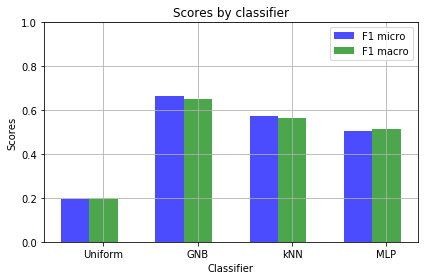

In [95]:
n_groups = 4
f1_micro = (f1_score(test_labels, preds_uniform, average = 'micro'), 
            0.6652173913043479, 
            0.571304347826087, 
            0.5028985507246376)

f1_macro = (f1_score(test_labels, preds_uniform, average = 'macro'), 
            0.6502906107965731, 
            0.5657971014492753, 
            0.5139550454032816)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, f1_micro, bar_width,
alpha=opacity,
color='b',
label='F1 micro ')

rects2 = plt.bar(index + bar_width, f1_macro, bar_width,
alpha=opacity,
color='g',
label='F1 macro')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Scores by classifier')
plt.xticks(index + bar_width, ("Uniform", "GNB", "kNN", "MLP"))
plt.legend()
plt.ylim(0, 1)
plt.grid(True)


plt.tight_layout()
plt.show()

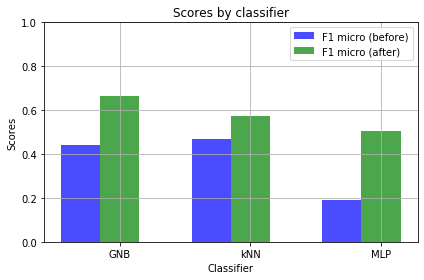

In [96]:
n_groups = 3
before_micro = (0.4405797101449275, 
            0.4692753623188406, 
            0.1910144927536232)

after_micro = (0.6652173913043479, 
            0.571304347826087, 
            0.5028985507246376)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, before_micro, bar_width,
alpha=opacity,
color='b',
label='F1 micro (before)')

rects2 = plt.bar(index + bar_width, after_micro, bar_width,
alpha=opacity,
color='g',
label='F1 micro (after)')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Scores by classifier')
plt.xticks(index + bar_width, ("GNB", "kNN", "MLP"))
plt.legend()
plt.ylim(0, 1)
plt.grid(True)


plt.tight_layout()
plt.show()

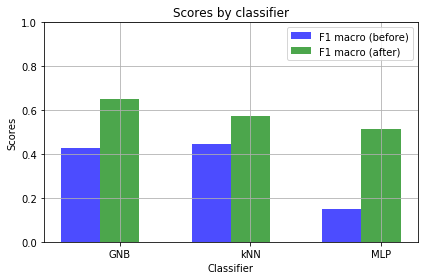

In [97]:
n_groups = 3
before_macro = (0.42572395425713394, 
            0.4436424483615854, 
            0.15061076919861244)

after_macro = (0.6502906107965731, 
            0.571304347826087, 
            0.5139550454032816)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7

rects1 = plt.bar(index, before_macro, bar_width,
alpha=opacity,
color='b',
label='F1 macro (before)')

rects2 = plt.bar(index + bar_width, after_macro, bar_width,
alpha=opacity,
color='g',
label='F1 macro (after)')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Scores by classifier')
plt.xticks(index + bar_width, ("GNB", "kNN", "MLP"))
plt.legend()
plt.ylim(0, 1)
plt.grid(True)


plt.tight_layout()
plt.show()

Παρατηρείται εντυπωσιακή αύξηση στα αποτελέσματα και των 3 εκτιμητών μετά την προεπεξεργασία. Η μεγαλύτερη αύξηση παρατηρείται στο νευρωνικό, μετά στην GBN και τέλος στο kNN. 
* Στους GNB και kNN είναι εμφανές πως οφείλεται στο PCA. Υπάρχουν 2 περιοχές τιμών, αυτές που προκύπτουν όταν χρησιμοποιείται και αυτές που προκύπτουν οταν δεν εφαρμόζεται. Οι συνιστώσες που μένουν είναι κυρίως 50 και 30 αντίστοιχα από τις 178 αρχικές. 
* Στο MLP παρατηρούμε πως χρήσιμος είναι και ο z-score και ο PCA. Με τον z-score οι είσοδοι αντιμετωπίζονται ισότιμα και αποφεύγεται το overfitting λόγω ειδικών περιπτώσεων. Με τον PCA μειώνεται ο αριθμός των χαρακτηριστικών, κάτι το οποίο βοηθά επίσης το μοντέλο να γενικεύσει καλύτερα με τα δείγματα που έχει για train.

Λόγω της ισορροπίας του dataset δεν παρατηρείται ιδιαίτερη διαφορά μεταξύ f1-micro και f1-macro. 

Ενδιαφέρον είχε το γεγονός οτι επιλέχθηκε σε όλες τις περιπτώσει το k στον αλγόριθμο kNN να πάρει την τιμή 1. Στην αρχή ξεκινήσαμε από 1 πολύ μεγαλύτερο σύνολο περιπτώσεων για το k (μέχρι 50), ωστόσο επέμεινε στην τιμή 1, γεγονός που ίσως οφείλεται σε ιδιαιτερότητες του dataset. Επίσης επιλέγεται γενικώς η Ευκλείδια απόσταση και η ομοιόφορφη σημασιολόγηση των αποστάσεων.

Δυστυχώς δεν προλάβαμε να εκπαιδεύσουμε το MLP όπως θα θέλαμε και χρησιμοποιήσαμε μόνο 1000 από τα 8500 δείγματα. Ωστόσο, ακόμα και έτσι τα ποιοτικά χαρακτηριστικά όπως η ανάγκη για προεγρασία είναι εμφανή. Επιβεβαιώνεται λοιπόν η σημασία της προεργασίας για τα νευρωνικά λόγω της ευαισθησίας των παραμέτρων στα χαρακτηριστικά των τιμών εισόδου. <br>
Το learning rate παραμένει σταθερό ενώ ο βέλτιστος αριθμός επιπέδων είναι κυρίως 15.

